filtered data: https://jmcauley.ucsd.edu/data/googlelocal/kcore/

In [61]:
import gzip
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def parseData(fname):
    for l in gzip.open(fname):
        d = eval(l)
        yield d

In [4]:
#filtering out users with <5 interactions
data_CA5 = list(parseData("CA_5.json.gz"))

In [5]:
data_CA5[0]

{'rating': 4.0,
 'reviewerName': 'Mary Gainza',
 'reviewText': 'Gap always has a jean that fits awesomely, i wish their prices were a bit competitive in comparison to their outlets, also the amount of the pieces they have in store sometimes fly so quick that is hard to find an specific size with their best sellers, but in general i really like this store and most of their products.',
 'categories': ['Clothing Store',
  "Women's Clothing Store",
  "Children's Clothing Store"],
 'gPlusPlaceId': '100556368174926958612',
 'unixReviewTime': 1355436757,
 'reviewTime': 'Dec 13, 2012',
 'gPlusUserId': '100000715097692381911'}

In [6]:
# filtering out users with <10 interactions, subset of CA_5
# only users with 10 or more interactions
data_CA10 = list(parseData('CA_10.json.gz'))

In [7]:
data_CA10[0]

{'rating': 4.0,
 'reviewerName': 'Rick Casady',
 'reviewText': None,
 'categories': ['Sushi Restaurant', 'Asian Restaurant', 'Japanese Restaurant'],
 'gPlusPlaceId': '100539657974695665920',
 'unixReviewTime': 1302881457,
 'reviewTime': 'Apr 15, 2011',
 'gPlusUserId': '100003840837471130074'}

In [17]:
places_CA = list(parseData('places_CA.json.gz'))

In [19]:
reviews_CA = list(parseData('reviews_CA.json.gz'))

In [20]:
print(len(data_CA5),len(data_CA10),len(places_CA),len(reviews_CA))

163408 76967 171271 778552


In [28]:
places_CA[0]

{'name': 'Diamond Valley Lake Marina',
 'price': None,
 'address': ['2615 Angler Ave', 'Hemet, CA 92545'],
 'hours': [['Monday', [['6:30 am--4:15 pm']]],
  ['Tuesday', [['6:30 am--4:15 pm']]],
  ['Wednesday', [['6:30 am--4:15 pm']], 1],
  ['Thursday', [['6:30 am--4:15 pm']]],
  ['Friday', [['6:30 am--4:15 pm']]],
  ['Saturday', [['6:30 am--4:15 pm']]],
  ['Sunday', [['6:30 am--4:15 pm']]]],
 'phone': '(951) 926-7201',
 'closed': False,
 'gPlusPlaceId': '104699454385822125632',
 'gps': [33.703804, -117.003209]}

In [35]:
count = set()
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in places_CA:
    count.add(i['price'])
    if i['price'] == '':
        count1 +=1
    if i['price'] == None:
        count2 +=1
    if i['price'] == '$':
        count3 +=1
    if i['price'] == '$$':
        count4 +=1
    if i['price'] == '$$$':
        count5 +=1
count

{'', '$', '$$', '$$$', None}

In [36]:
[count1,count2,count3,count4,count5]

[197, 124356, 2068, 23954, 20696]

**EDA**<br />
1) distribution of reviews across time of day (David)<br />
2) categories for businesses (Andrew)<br />
3) distribution across years/months (David)<br />
4) distribution of words in review (Andrew)<br />
5) (Maricela) come up with something else?

## EDA Number of Reviews

In [ ]:
#Categories for businesses
#Get average rating for each category
#get number of reviews per cat

In [8]:
data_CA5[0]

{'rating': 4.0,
 'reviewerName': 'Mary Gainza',
 'reviewText': 'Gap always has a jean that fits awesomely, i wish their prices were a bit competitive in comparison to their outlets, also the amount of the pieces they have in store sometimes fly so quick that is hard to find an specific size with their best sellers, but in general i really like this store and most of their products.',
 'categories': ['Clothing Store',
  "Women's Clothing Store",
  "Children's Clothing Store"],
 'gPlusPlaceId': '100556368174926958612',
 'unixReviewTime': 1355436757,
 'reviewTime': 'Dec 13, 2012',
 'gPlusUserId': '100000715097692381911'}

In [22]:
cats = defaultdict(list)

In [27]:
for d in data_CA5:
    if d['categories']:
        for c in d['categories']:
            cats[c].append(d['rating'])
    else:
        cats["None"].append(d['rating'])

In [71]:
len(cats)

1011

In [164]:
c = [(c, len(cats[c]), np.mean(cats[c])) for c in cats]

In [169]:
c

[('Clothing Store', 3142, 4.160407383831954),
 ("Women's Clothing Store", 1450, 4.08),
 ("Children's Clothing Store", 369, 4.043360433604336),
 ('Department Store', 2597, 3.822872545244513),
 ("Men's Clothing Store", 1445, 4.113494809688581),
 ('Juice Shop', 737, 3.898236092265943),
 ('Cafe', 27093, 4.05540176429336),
 ('Restaurant', 36242, 3.9737321339881904),
 ('Bakery', 14221, 4.109204697278672),
 ('Cosmetics Store', 269, 4.449814126394052),
 ('Korean Restaurant', 3431, 3.9565724278635965),
 ('Asian Restaurant', 71546, 3.921281413356442),
 ('Hamburger Restaurant', 22064, 3.86575416968818),
 ('Fast Food Restaurant', 28899, 3.870825980137721),
 ('Spanish Restaurant', 2869, 4.0338096897873825),
 ('European Restaurant', 53116, 3.99934106483922),
 ('Wine Bar', 10972, 4.13698505286183),
 ('Coffee Shop', 23940, 4.124812030075188),
 ('Barbecue Restaurant', 6050, 3.9127272727272726),
 ('American Restaurant', 101292, 3.9710342376495675),
 ('Public Library', 427, 4.39344262295082),
 ('Attracti

<AxesSubplot:title={'center':'Histogram of Average Ratings per Category'}, ylabel='Frequency'>

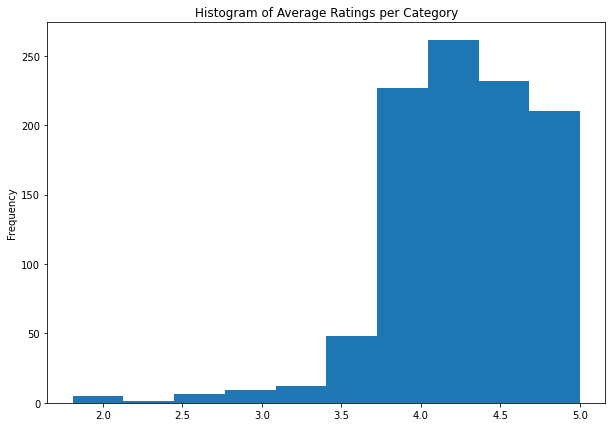

In [165]:
dfCats = pd.DataFrame(c)
dfCats.sort_values(2, ascending=False).set_index(0)[2].plot(
    kind="hist", 
    title="Histogram of Average Ratings per Category",
    figsize=(10, 7))

<AxesSubplot:title={'center':'Count of All Ratings'}, ylabel='Frequency'>

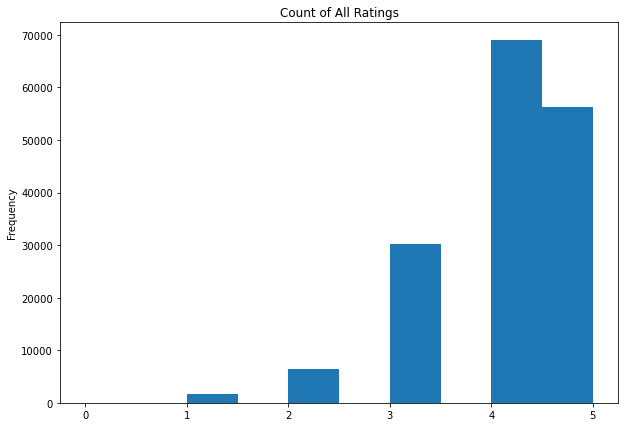

In [129]:
pd.Series([d["rating"] for d in data_CA5]).plot(
    kind="hist",
    title="Count of All Ratings",
    figsize=(10,7))

In [64]:
dfCatsCount = dfCats.sort_values(1, ascending=False)[:25].set_index(0)

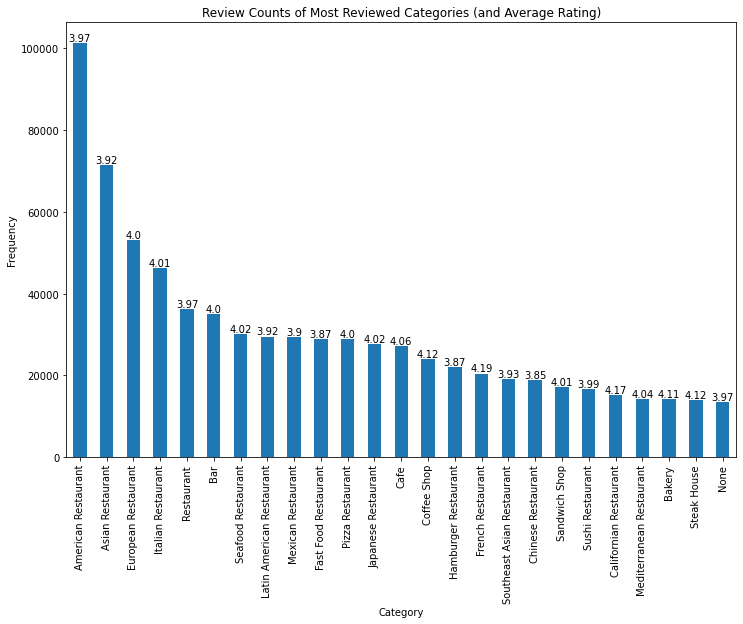

In [167]:
plt.figure(figsize=(12, 8))
ax = dfCatsCount[1].plot(kind="bar")
ax.set_title("Review Counts of Most Reviewed Categories (and Average Rating)")
ax.set_xlabel("Category")
ax.set_ylabel("Frequency")

rects = ax.patches

# Make some labels.
labels = dfCatsCount[2].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

<Figure size 432x288 with 0 Axes>

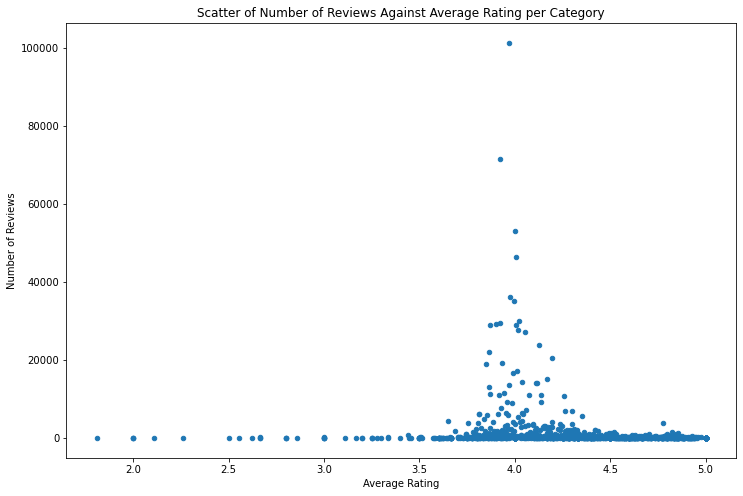

In [146]:
#All the top reviews were around 4, so this checks out
plt.figure()
ax = dfCats.set_index(0).plot(kind="scatter", x=2, y=1, figsize=(12, 8))
ax.set_title("Scatter of Number of Reviews Against Average Rating per Category")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Reviews")

plt.show()

In [84]:
dfWords = pd.DataFrame([[len(d["reviewText"].split()), d["rating"]] for d in data_CA5 if d["reviewText"]], columns = ['words', 'rating'])
dfWords

,words,rating
0,60,4.0
1,42,4.0
2,54,4.0
3,38,5.0
4,55,5.0
...,...,...
91426,16,4.0
91427,45,4.0
91428,10,5.0
91429,16,4.0


## EDA Length of Reviews

In [111]:
cats2 = defaultdict(list)
for d in data_CA5:
    if d['categories']:
        i = d['categories']
    else:
        i = ["None"]
    if d['reviewText']:
        w = len(d['reviewText'].split())
    else:
        w = 0
    for c in i:
        if c in cats2:
            cats2[c][0].append(d['rating'])
            cats2[c][1].append(w)
        else:
            cats2[c].append([d['rating']])
            cats2[c].append([w])

In [117]:
c2 = [(c, len(cats2[c][0]), np.mean(cats2[c][0]), np.mean(cats2[c][1])) for c in cats]

In [170]:
c2

[('Clothing Store', 785, 4.160509554140128, 21.086624203821657),
 ("Women's Clothing Store", 362, 4.080110497237569, 23.861878453038674),
 ("Children's Clothing Store", 92, 4.043478260869565, 14.793478260869565),
 ('Department Store', 649, 3.822804314329738, 18.298921417565484),
 ("Men's Clothing Store", 361, 4.113573407202216, 19.42105263157895),
 ('Juice Shop', 184, 3.8967391304347827, 15.907608695652174),
 ('Cafe', 6769, 4.055399615895997, 20.162210075343477),
 ('Restaurant', 9057, 3.9737219829965773, 20.744617422987744),
 ('Bakery', 3554, 4.1091727630838495, 21.456105796285875),
 ('Cosmetics Store', 67, 4.447761194029851, 29.776119402985074),
 ('Korean Restaurant', 857, 3.9568261376896148, 29.668611435239207),
 ('Asian Restaurant', 17877, 3.921127705990938, 20.440566090507357),
 ('Hamburger Restaurant', 5512, 3.865747460087083, 17.019049346879534),
 ('Fast Food Restaurant', 7219, 3.870896246017454, 16.512397839035877),
 ('Spanish Restaurant', 717, 4.03347280334728, 24.2050209205020

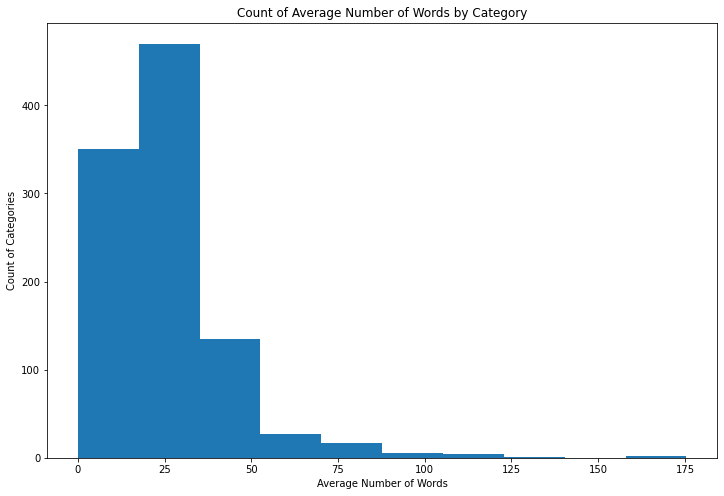

In [148]:
#All the top reviews were around 4, so this checks out
plt.figure()
ax = pd.DataFrame(c2).sort_values(3, ascending=False).set_index(0)[3].plot(kind="hist", figsize=(12, 8))
ax.set_title("Count of Average Number of Words by Category")
ax.set_xlabel("Average Number of Words")
ax.set_ylabel("Count of Categories")

plt.show()

<AxesSubplot:title={'center':'Count of Number of Words in All Reviews'}, ylabel='Frequency'>

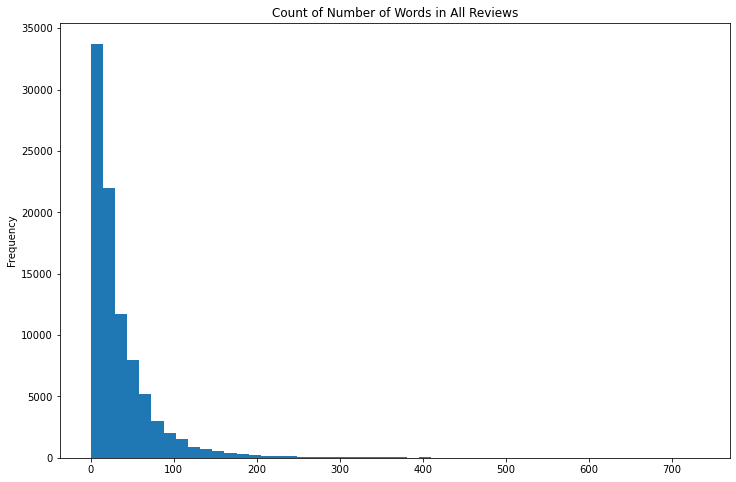

In [149]:
#Count of all words binned
dfWords["words"].plot(kind="hist", bins=50, figsize=(12,8), title="Count of Number of Words in All Reviews")

In [155]:
topAvgWords = pd.DataFrame(c2).sort_values(3, ascending=False)[:20].set_index(0)

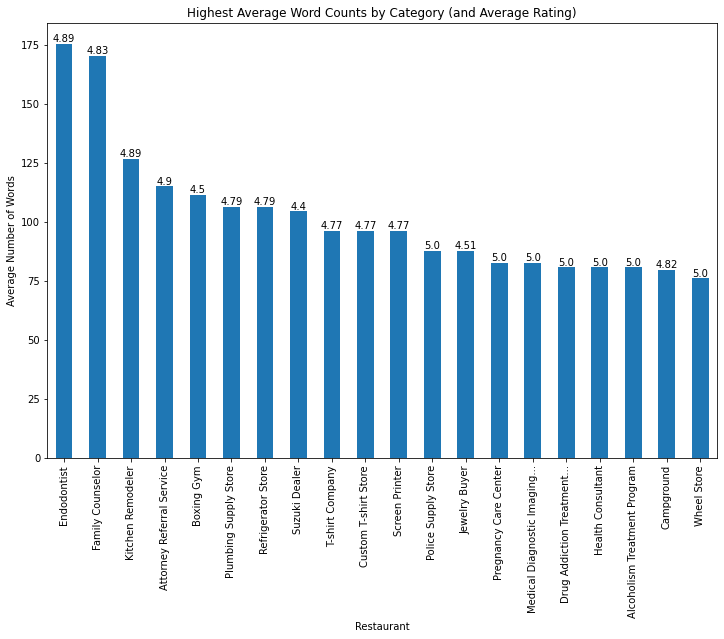

In [158]:
plt.figure(figsize=(12, 8))
ax = topAvgWords[3].plot(kind="bar")
ax.set_title("Highest Average Word Counts by Category (and Average Rating)")
ax.set_xlabel("Restaurant")
ax.set_ylabel("Average Number of Words")

rects = ax.patches

# Make some labels.
labels = topAvgWords[2].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

plt.show()

In [175]:
c2

[('Clothing Store', 785, 4.160509554140128, 21.086624203821657),
 ("Women's Clothing Store", 362, 4.080110497237569, 23.861878453038674),
 ("Children's Clothing Store", 92, 4.043478260869565, 14.793478260869565),
 ('Department Store', 649, 3.822804314329738, 18.298921417565484),
 ("Men's Clothing Store", 361, 4.113573407202216, 19.42105263157895),
 ('Juice Shop', 184, 3.8967391304347827, 15.907608695652174),
 ('Cafe', 6769, 4.055399615895997, 20.162210075343477),
 ('Restaurant', 9057, 3.9737219829965773, 20.744617422987744),
 ('Bakery', 3554, 4.1091727630838495, 21.456105796285875),
 ('Cosmetics Store', 67, 4.447761194029851, 29.776119402985074),
 ('Korean Restaurant', 857, 3.9568261376896148, 29.668611435239207),
 ('Asian Restaurant', 17877, 3.921127705990938, 20.440566090507357),
 ('Hamburger Restaurant', 5512, 3.865747460087083, 17.019049346879534),
 ('Fast Food Restaurant', 7219, 3.870896246017454, 16.512397839035877),
 ('Spanish Restaurant', 717, 4.03347280334728, 24.2050209205020

In [174]:
pd.DataFrame(c2).median()

1    27.000000
2     4.300000
3    21.264957
dtype: float64

<Figure size 432x288 with 0 Axes>

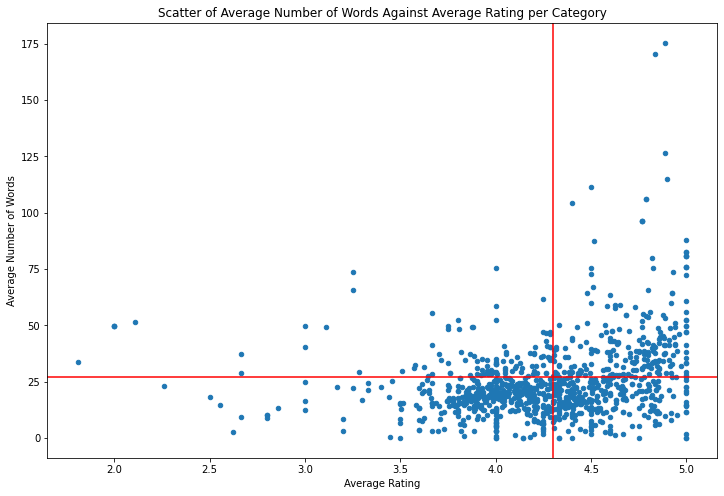

In [182]:
#All the top ratings were around 5, so this checks out
plt.figure()
dfWordsRating = pd.DataFrame(c2)
ax = dfWordsRating.set_index(0).plot(kind="scatter", x=2, y=3, figsize=(12, 8))
ax.set_title("Scatter of Average Number of Words Against Average Rating per Category")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Average Number of Words")

plt.axhline(y=pd.DataFrame(c2).median()[1], color='r', linestyle='-') 
plt.axvline(x=pd.DataFrame(c2).median()[2], color='r', linestyle='-') 



plt.show()

**Baseline Model**: Predict the average every time and compute MSE [with and without rounding] (Andrew)<br /> 
**Ablation Experiment**: to determine feature importance<br />
    or Principal Component Analysis<br />
Look at Prof's paper from this dataset

**Price?**<br />
(Andrew)<br />
One-Hot Encoding

**Text Analysis?**<br />
(Maricela)<br />
TfIdf?

**Cosine Feature**<br />
(Andrew)

In [ ]:
#Train-Validation-Validation (65%-20%-15%)
#compare MSE, look into F1?, or other model measurements

Linear Regression Model<br />
Decision Tree Regression/Classification<br />
SVD<br />
K-Nearest Neighbors<br />
Other Models?

Evaluating Overfitting<br />
test on both CA_5 and CA_10